<a href="https://colab.research.google.com/github/Caduescanti/Modelo-insing/blob/main/modelo_ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Modelo Insing

## Alunos:
- **Carlos Eduardo**  
  Matrícula: 514072

- **Maria Eduarda**  
  Matrícula: 510976

---

### Descrição do Trabalho:  implementação do método de Metropolis-Hastings

# Aplicações do Modelo de Ising

O modelo de Ising é um dos modelos mais versáteis e amplamente utilizados em física estatística, mas suas aplicações vão muito além da física.


In [1]:
from scipy.constants import Boltzmann as k
import itertools

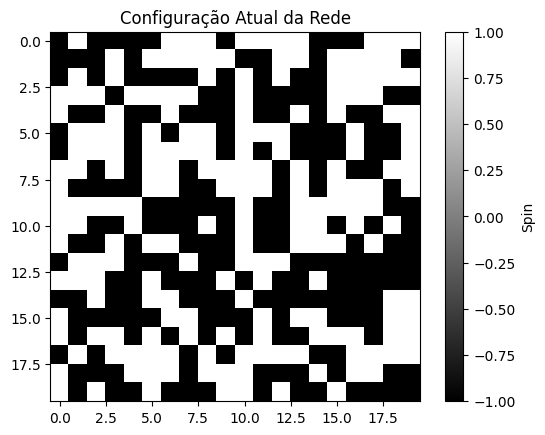

+---------------------------------------+------------------------+
|               Descrição               |         Valor          |
+---------------------------------------+------------------------+
|      Constante de normalização Z      | 2.449163619119402e+167 |
| Probabilidade da configuração inicial | 1.1699238753601987e-26 |
+---------------------------------------+------------------------+


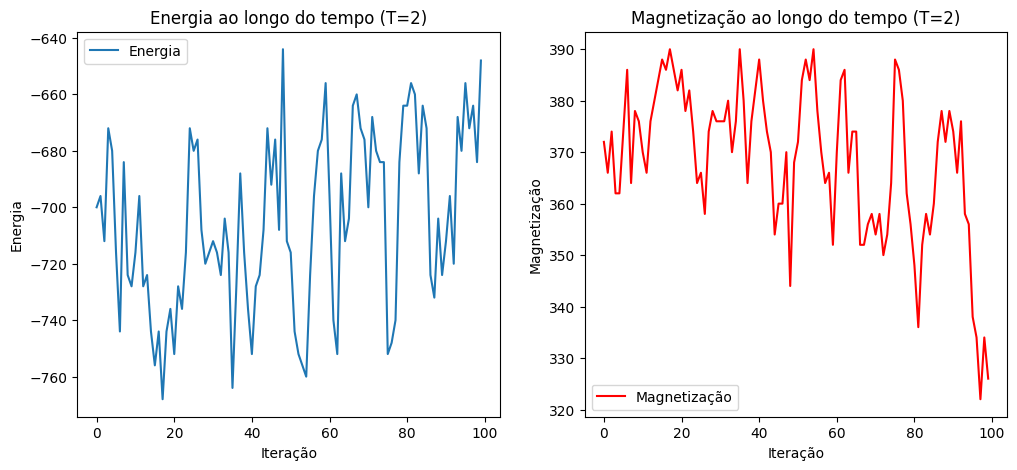

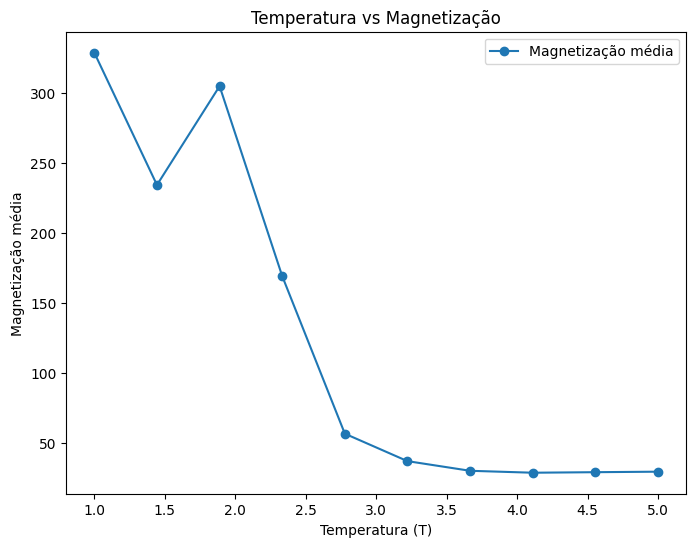

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
from prettytable import PrettyTable

class IsingModel:
    def __init__(self, tamanho, temperatura):
        self.tamanho = tamanho
        self.temperatura = temperatura
        self.rede = np.random.choice([-1, 1], size=(tamanho, tamanho))
        k = 1.0  # Constante de Boltzmann
        self.beta = 1 / (k * temperatura)  # β = 1 / (kT)

    def energia(self, grade=None):
        if grade is None:
            grade = self.rede
        energia_total = 0
        for i in range(self.tamanho):
            for j in range(self.tamanho):
                vizinhos = (
                    grade[(i + 1) % self.tamanho, j] +
                    grade[(i - 1) % self.tamanho, j] +
                    grade[i, (j + 1) % self.tamanho] +
                    grade[i, (j - 1) % self.tamanho]
                )
                energia_total += -grade[i, j] * vizinhos
        return energia_total / 2  # Evita contagem dupla

    def magnetizacao(self):
        return np.sum(self.rede)

    def calcular_Z(self, termalizacao=1000, realizacoes=10):
        """Método para calcular a constante Z usando Monte Carlo com termalização e múltiplas realizações."""
        Z_total = 0
        for _ in range(realizacoes):
            # Termalização
            for _ in range(termalizacao):
                self.monte_carlo()

            # Cálculo de Z após termalização
            Z_realizacao = 0
            for _ in range(self.tamanho ** 2):
                self.monte_carlo()
                E = self.energia()
                Z_realizacao += np.exp(-self.beta * E)
            Z_total += Z_realizacao / (self.tamanho ** 2)

        return Z_total / realizacoes  # Média das realizações

    def probabilidade_configuracao(self, grade):
        """Calcula P_β(σ) = e^(-βE(σ)) / Z."""
        E_sigma = self.energia(grade)
        Z = self.calcular_Z()
        return np.exp(-self.beta * E_sigma) / Z

    def monte_carlo(self):
        for _ in range(self.tamanho ** 2):
            i, j = np.random.randint(0, self.tamanho, size=2)
            spin = self.rede[i, j]
            vizinhos = (
                self.rede[(i + 1) % self.tamanho, j] +
                self.rede[(i - 1) % self.tamanho, j] +
                self.rede[i, (j + 1) % self.tamanho] +
                self.rede[i, (j - 1) % self.tamanho]
            )
            delta_E = 2 * spin * vizinhos
            if delta_E < 0 or random.random() < np.exp(-delta_E / self.temperatura):
                self.rede[i, j] *= -1

    def simular(self, passos):
        energias = []
        magnetizacoes = []
        for _ in range(passos):
            self.monte_carlo()
            energias.append(self.energia())
            magnetizacoes.append(self.magnetizacao())
        return energias, magnetizacoes

    def mostrar_rede(self):
        plt.imshow(self.rede, cmap='gray')
        plt.title("Configuração Atual da Rede")
        plt.colorbar(label='Spin')
        plt.show()

def plotar_resultados(energias, magnetizacoes, temperatura):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(energias, label='Energia')
    plt.xlabel('Iteração')
    plt.ylabel('Energia')
    plt.title(f'Energia ao longo do tempo (T={temperatura})')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(magnetizacoes, label='Magnetização', color='r')
    plt.xlabel('Iteração')
    plt.ylabel('Magnetização')
    plt.title(f'Magnetização ao longo do tempo (T={temperatura})')
    plt.legend()
    plt.show()

def temperatura_vs_magnetizacao(temperaturas, passos, tamanho):
    """Plota a magnetização média em função da temperatura."""
    magnetizacoes_por_temperatura = []

    for T in temperaturas:
        modelo = IsingModel(tamanho, T)
        _, magnetizacoes = modelo.simular(passos)
        magnetizacoes_por_temperatura.append(np.mean(np.abs(magnetizacoes)))

    plt.figure(figsize=(8, 6))
    plt.plot(temperaturas, magnetizacoes_por_temperatura, label='Magnetização média', marker='o')
    plt.xlabel('Temperatura (T)')
    plt.ylabel('Magnetização média')
    plt.title('Temperatura vs Magnetização')
    plt.legend()
    plt.show()

# Parâmetros
tamanho = 20  # Grade pequena para viabilidade computacional
temperatura = 2
temperaturas = np.linspace(1, 5, 10)  # Variação de temperatura
passos = 100  # Monte Carlo

# Simulação
modelo = IsingModel(tamanho, temperatura)
modelo.mostrar_rede()

# Calcular Z e P_β(σ) para a configuração inicial
Z = modelo.calcular_Z()
prob_inicial = modelo.probabilidade_configuracao(modelo.rede)

# Criar a tabela
tabela = PrettyTable()
tabela.field_names = ["Descrição", "Valor"]
tabela.add_row(["Constante de normalização Z", Z])
tabela.add_row(["Probabilidade da configuração inicial", prob_inicial])

# Exibir a tabela
print(tabela)

# Resultados
energias, magnetizacoes = modelo.simular(passos)
plotar_resultados(energias, magnetizacoes, temperatura)
temperatura_vs_magnetizacao(temperaturas, passos, tamanho)